import

In [5]:
from src import metrics, viz,io_utils

sales_data_df = io_utils.load_data("data/ecommerce_sales.csv")



# Test nyckeltal

In [6]:

print(metrics.top_3_category_by_revenue(sales_data_df))
print(metrics.top_3_date_by_revenue(sales_data_df ))
print(metrics.revenue_per_city(sales_data_df))
print(metrics.revenue_per_category(sales_data_df))
print(metrics.total_revenue(sales_data_df))
print(metrics.total_units(sales_data_df))
print(metrics.aov(sales_data_df))
print(metrics.aov_per_category(sales_data_df).head(3))
print(metrics.summary_city(sales_data_df))



      category     revenue
0  Electronics  1364228.07
1       Sports   734653.42
2     Clothing   586744.91
        date   revenue
0 2024-02-26  45538.28
1 2024-04-09  39530.14
2 2024-06-07  38232.87
        city     revenue
0  Stockholm  1227201.94
1   Göteborg   859019.65
2      Malmö   567926.32
3    Uppsala   551478.42
4   Västerås   297140.90
      category     revenue
0  Electronics  1364228.07
1       Sports   734653.42
2     Clothing   586744.91
3         Home   511070.87
4       Beauty   163053.97
5         Toys   143015.99
3502767.2300000004
7463
1400.546673330668
      category         aov
0  Electronics  778.224797
1       Sports  524.377887
2         Home  399.898959
        city  total_revenue  total_units  orders
0  Stockholm     1227201.94         2619     899
1   Göteborg      859019.65         1788     586
2      Malmö      567926.32         1211     396
3    Uppsala      551478.42         1165     381
4   Västerås      297140.90          680     238


# Test Visualisering

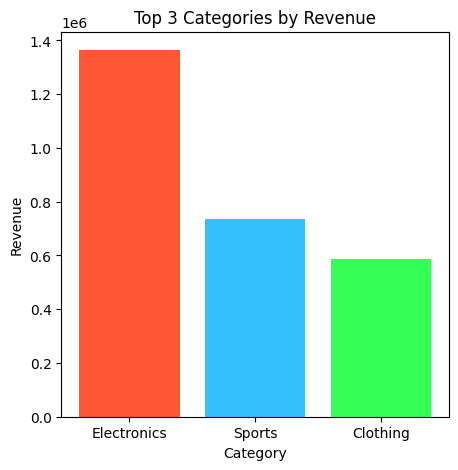

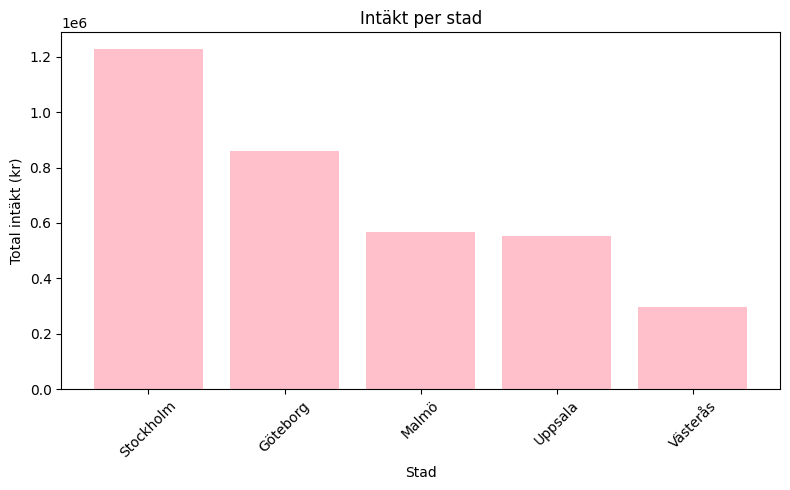

In [7]:
#Testar visualiseringen
viz.top_3_category_by_revenue_graph(sales_data_df)
viz.revenue_per_city(sales_data_df)